<a href="https://colab.research.google.com/github/s4r1n4/islasl/blob/main/Sign_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Training & Evaluating a Convolutional Neural Network Model to Detect Indian & American Sign Languages**
---
Sareena Khan
---




# **Operations on the dataset: Extracting the data, Visualising the data, Refining the data.**


* ## **Extracting the Data**
The data was extracted from Kaggle, where the Indian Sign Language and American Sign Language datasets were downloaded. Our datasets are wide and consist of .jpg files of all the letters of the English alphabet as well as numbers from 0-9.

### **Step 1: Mounting Drive**
This is fetching `kaggle.json` from Google Drive which authenticates Kaggle API access.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Step 2: Downloading the datasets for both Indian Sign Language and American Sign Language from Kaggle**
This is downloading the datasets from Kaggle to the notebook.

In [2]:
# For ISL dataset
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

# For ASL dataset
!kaggle datasets download -d prathumarikeri/american-sign-language-09az

Dataset URL: https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl
License(s): CC-BY-SA-4.0
indian-sign-language-isl.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/prathumarikeri/american-sign-language-09az
License(s): CC-BY-SA-4.0
american-sign-language-09az.zip: Skipping, found more recently modified local copy (use --force to force download)


### **Step 3: Unzipping the datasets**
This is unzipping the datasets for use.

In [3]:
# For ISL dataset
!unzip -o indian-sign-language-isl.zip -d ./isl_data

# For ASL dataset
!unzip -o american-sign-language-09az.zip -d ./asl_data


Archive:  indian-sign-language-isl.zip
replace ./isl_data/Indian/1/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  american-sign-language-09az.zip
replace ./asl_data/American/0/1 copy.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### **Step 4: Checking the directory contents**
This is ensuring we're looking at the right data.

In [4]:
import os
# Check ISL dataset contents
isl_data_path = './isl_data'
print("ISL Dataset Contents:", os.listdir(isl_data_path))

# Check ASL dataset contents
asl_data_path = './asl_data'
print("ASL Dataset Contents:", os.listdir(asl_data_path))

# Check contents inside "Indian" (for ISL) and "American" (for ASL)
print("ISL 'Indian' Folder Contents:", os.listdir('./isl_data/Indian'))
print("ASL 'American' Folder Contents:", os.listdir('./asl_data/American'))

ISL Dataset Contents: ['Indian']
ASL Dataset Contents: ['American']
ISL 'Indian' Folder Contents: ['B', 'R', 'G', 'E', 'M', 'A', '9', '8', 'L', 'I', '6', 'H', 'N', 'W', '3', 'D', 'U', 'O', 'C', 'Q', 'X', 'F', 'K', '2', 'Z', '4', '7', 'T', 'S', 'J', '5', 'V', 'P', '1', 'Y']
ASL 'American' Folder Contents: ['m', 'l', 's', 'k', 'j', 'b', '9', '8', 'r', 't', '6', 'x', 'd', 'y', 'i', 'p', '3', 'z', 'n', 'o', '0', 'c', 'w', 'q', 'f', 'a', 'e', 'v', '2', 'h', '4', '7', 'u', 'g', '5', '1']


* ## **Visualising & Representing the Data**
The datasets contain directories for folders having images labelled for 0-9 and a-z.
The ISL dataset does not have 0 because the symbol for 0 is the same in both ASL and ISL.

### **Step 1: Representing the Dataset's General Information**
This is representing general information about the dataset.

In [16]:
from PIL import Image
import pandas as pd
import os
from tabulate import tabulate

# Define dataset paths
isl_dataset_path = './isl_data/Indian'
asl_dataset_path = './asl_data/American'

# ISL Class Distribution
isl_class_counts = {folder: len(os.listdir(os.path.join(isl_dataset_path, folder)))
                    for folder in os.listdir(isl_dataset_path) if os.path.isdir(os.path.join(isl_dataset_path, folder))}
isl_class_df = pd.DataFrame(list(isl_class_counts.items()), columns=["Class", "Number of Samples"])
isl_class_df = isl_class_df.sort_values(by="Class")  # Sort alphabetically

# ASL Class Distribution
asl_class_counts = {folder: len(os.listdir(os.path.join(asl_dataset_path, folder)))
                    for folder in os.listdir(asl_dataset_path) if os.path.isdir(os.path.join(asl_dataset_path, folder))}
asl_class_df = pd.DataFrame(list(asl_class_counts.items()), columns=["Class", "Number of Samples"])
asl_class_df = asl_class_df.sort_values(by="Class")  # Sort alphabetically

# Analyse image sizes for ISL
sizes_isl = []
for folder in os.listdir(isl_dataset_path):
    folder_path = os.path.join(isl_dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, img_file)
            try:
                with Image.open(image_path) as img:
                    sizes_isl.append(img.size)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Analyse image sizes for ASL
sizes_asl = []
for folder in os.listdir(asl_dataset_path):
    folder_path = os.path.join(asl_dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, img_file)
            try:
                with Image.open(image_path) as img:
                    sizes_asl.append(img.size)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Create DataFrames for sizes
size_df_isl = pd.DataFrame(sizes_isl, columns=["Width", "Height"])
size_df_asl = pd.DataFrame(sizes_asl, columns=["Width", "Height"])

# Display ISL Class Distribution Table without serial number
print("ISL Class Distribution:")
print(tabulate(isl_class_df.set_index('Class'), headers='keys', tablefmt='fancy_grid'))

# Display ASL Class Distribution Table without serial number
print("\nASL Class Distribution:")
print(tabulate(asl_class_df.set_index('Class'), headers='keys', tablefmt='fancy_grid'))

# Display ISL Image Size Info
print("\nISL Image Size Info:")
print(tabulate(size_df_isl.describe(), headers='keys', tablefmt='fancy_grid'))

# Display ASL Image Size Info
print("\nASL Image Size Info:")
print(tabulate(size_df_asl.describe(), headers='keys', tablefmt='fancy_grid'))


ISL Class Distribution:
╒═════════╤═════════════════════╕
│ Class   │   Number of Samples │
╞═════════╪═════════════════════╡
│ 1       │                1200 │
├─────────┼─────────────────────┤
│ 2       │                1200 │
├─────────┼─────────────────────┤
│ 3       │                1200 │
├─────────┼─────────────────────┤
│ 4       │                1200 │
├─────────┼─────────────────────┤
│ 5       │                1200 │
├─────────┼─────────────────────┤
│ 6       │                1200 │
├─────────┼─────────────────────┤
│ 7       │                1200 │
├─────────┼─────────────────────┤
│ 8       │                1200 │
├─────────┼─────────────────────┤
│ 9       │                1200 │
├─────────┼─────────────────────┤
│ A       │                1200 │
├─────────┼─────────────────────┤
│ B       │                1200 │
├─────────┼─────────────────────┤
│ C       │                1447 │
├─────────┼─────────────────────┤
│ D       │                1200 │
├─────────┼─────────────

### **Step 2: Exploring the Dataset's Scale using plots.**
This is plotting the wide range of items available in the datasets.

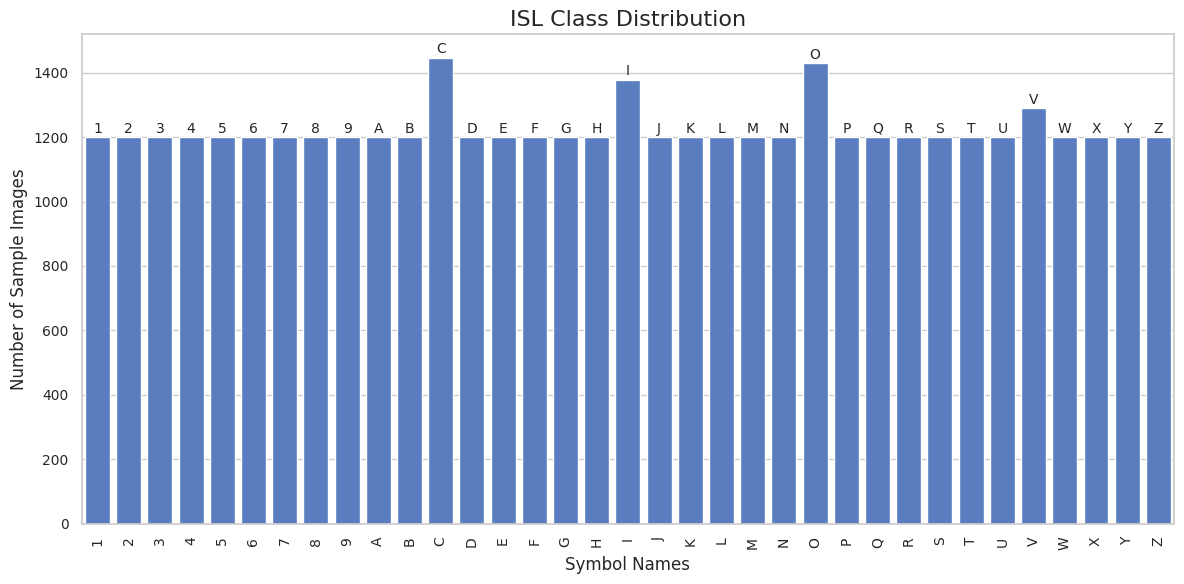

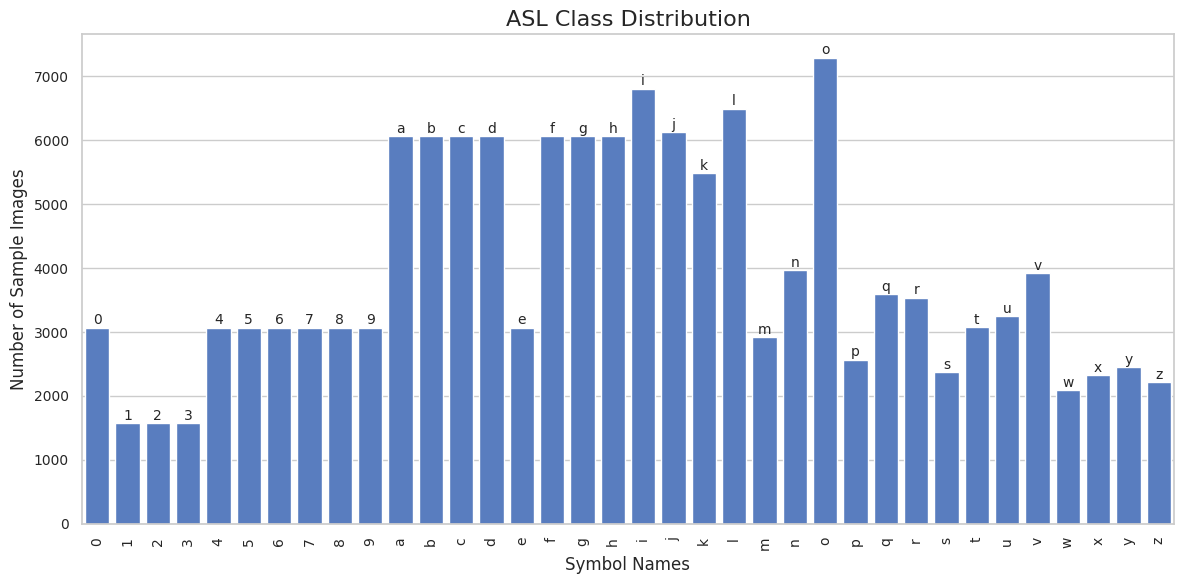

In [6]:
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to the dataset folders
isl_dataset_path = './isl_data/Indian'  # For ISL dataset
asl_dataset_path = './asl_data/American'  # For ASL dataset

def get_class_image_count_and_sample(dataset_path):
    class_counts = {}
    sample_images = {}
    # Sort the folder names alphabetically
    for foldername in sorted(os.listdir(dataset_path)):  # Sorting folder names alphabetically
        folder_path = os.path.join(dataset_path, foldername)
        if os.path.isdir(folder_path):  # Ensure we're looking at directories
            image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            class_counts[foldername] = len(image_files)
            if image_files:  # Get the first image as a sample
                sample_image_path = os.path.join(folder_path, image_files[0])
                sample_images[foldername] = Image.open(sample_image_path)
    return class_counts, sample_images

# Get ISL and ASL class counts and sample images
isl_class_counts, isl_sample_images = get_class_image_count_and_sample(isl_dataset_path)
asl_class_counts, asl_sample_images = get_class_image_count_and_sample(asl_dataset_path)
sns.set(style="whitegrid", palette="muted")

# Visualize ISL class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(isl_class_counts.keys()), y=list(isl_class_counts.values()))
plt.title('ISL Class Distribution', fontsize=16)
plt.xlabel('Symbol Names', fontsize=12)
plt.ylabel('Number of Sample Images', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
for i, (label, image) in enumerate(isl_sample_images.items()):
    plt.text(i, isl_class_counts[label] + 5, label, ha='center', va='bottom', fontsize=10)
plt.tight_layout()

# Visualize ASL class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(asl_class_counts.keys()), y=list(asl_class_counts.values()))
plt.title('ASL Class Distribution', fontsize=16)
plt.xlabel('Symbol Names', fontsize=12)
plt.ylabel('Number of Sample Images', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
for i, (label, image) in enumerate(asl_sample_images.items()):
    plt.text(i, asl_class_counts[label] + 5, label, ha='center', va='bottom', fontsize=10)
plt.tight_layout()

# Show the plots
plt.show()

* ## **Refining the Data**
Refinement involved removing blank images (all white pixels) and corrupt files. Additionally, images were resized to 256x256 pixels for uniformity.

### **Step 1: Detecting blank images using Pillow by checking for white pixels throughout the image and removing them from the datasets.**
This is detecting images with fully white pixels and removing them.

In [7]:
from PIL import Image
import os

# Paths to the dataset folders
isl_dataset_path = './isl_data/Indian'  # For ISL dataset
asl_dataset_path = './asl_data/American'  # For ASL dataset

def is_blank_image(image_path):
    """Check if the image is blank (all pixels are white)."""
    try:
        with Image.open(image_path) as img:
            img = img.convert('L')  # Convert to grayscale
            pixels = list(img.getdata())
            if all(pixel == 255 for pixel in pixels):  # White pixel
                return True
            return False
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return True
def remove_invalid_images(dataset_path):
    """Remove blank or corrupted images from the dataset and count them."""
    blank_images_removed = 0  # Counter for blank images removed
    for foldername in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, foldername)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)
                if os.path.isfile(image_path):  # Only process files
                    if is_blank_image(image_path):
                        print(f"Removing blank image: {image_path}")
                        os.remove(image_path)
                        blank_images_removed += 1  # Increment counter for each blank image removed
    print(f"\nTotal blank images removed from {dataset_path}: {blank_images_removed}")
  # Run the function for both ISL and ASL datasets
remove_invalid_images(isl_dataset_path)
remove_invalid_images(asl_dataset_path)
print("Blank images have been removed.")


Total blank images removed from ./isl_data/Indian: 0

Total blank images removed from ./asl_data/American: 0
Blank images have been removed.


### **Step 2: Resizing images to a standard 128x128 for a consistent dataset.**
This is using ImageDataGenerator to resize images to 128x128 while loading them into memory.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image

# Paths to the dataset folders
isl_dataset_path = './isl_data/Indian'  # For ISL dataset
asl_dataset_path = './asl_data/American'  # For ASL dataset

# Initialize ImageDataGenerator with 128x128 resizing
train_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for both ISL and ASL datasets with 128x128 target size
isl_generator = train_datagen.flow_from_directory(
    isl_dataset_path,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical'
)

asl_generator = train_datagen.flow_from_directory(
    asl_dataset_path,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical'
)
print(f"Total images resized in {isl_dataset_path}: {len(isl_generator.filenames)}")
print(f"Total images resized in {asl_dataset_path}: {len(asl_generator.filenames)}")
for img_batch, _ in isl_generator:
    print(f"Resized image batch shape: {img_batch.shape}")
    break


Found 42745 images belonging to 35 classes.
Found 142261 images belonging to 36 classes.
Total images resized in ./isl_data/Indian: 42745
Total images resized in ./asl_data/American: 142261
Resized image batch shape: (32, 128, 128, 3)


### **Step 3: Removing corrupt files (if any)**
This is detecting files that are corrupt and do not work and removing them.

In [9]:
from PIL import Image
import os

def remove_corrupt_images(dataset_path):
    """Remove corrupted image files from the dataset."""
    corrupt_images_removed = 0
    for foldername in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, foldername)
        if os.path.isdir(folder_path):  # Ensure we're looking at directories
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)
                if os.path.isfile(image_path):  # Only process files
                    try:
                        with Image.open(image_path) as img:
                            img.verify()  # Verify that the image is not corrupted
                    except (IOError, SyntaxError) as e:
                        print(f"Corrupted image removed: {image_path}")
                        os.remove(image_path)
                        corrupt_images_removed += 1  # Increment counter for each corrupted image removed
    print(f"\nTotal corrupted images removed from {dataset_path}: {corrupt_images_removed}")

# Example usage:
remove_corrupt_images(isl_dataset_path)
remove_corrupt_images(asl_dataset_path)


Total corrupted images removed from ./isl_data/Indian: 0

Total corrupted images removed from ./asl_data/American: 0


# **Model Development, Training & Testing**

* ## **Model Development**

### **Step 1: Checking the Contents of our Datasets**
This is verifying the contents before getting started.

In [10]:
import os

# Check and print contents of ISL and ASL subfolders
isl_main_path = './isl_data/Indian'
asl_main_path = './asl_data/American'

if os.path.exists(isl_main_path):
    print("ISL Data Contents:")
    for folder in sorted(os.listdir(isl_main_path)):
        folder_path = os.path.join(isl_main_path, folder)
        if os.path.isdir(folder_path):
            print(f"  {folder} - {len(os.listdir(folder_path))} images")
else:
    print("ISL data folder not found")

if os.path.exists(asl_main_path):
    print("\nASL Data Contents:")
    for folder in sorted(os.listdir(asl_main_path)):
        folder_path = os.path.join(asl_main_path, folder)
        if os.path.isdir(folder_path):
            print(f"  {folder} - {len(os.listdir(folder_path))} images")
else:
    print("ASL data folder not found")

ISL Data Contents:
  1 - 1200 images
  2 - 1200 images
  3 - 1200 images
  4 - 1200 images
  5 - 1200 images
  6 - 1200 images
  7 - 1200 images
  8 - 1200 images
  9 - 1200 images
  A - 1200 images
  B - 1200 images
  C - 1447 images
  D - 1200 images
  E - 1200 images
  F - 1200 images
  G - 1200 images
  H - 1200 images
  I - 1379 images
  J - 1200 images
  K - 1200 images
  L - 1200 images
  M - 1200 images
  N - 1200 images
  O - 1429 images
  P - 1200 images
  Q - 1200 images
  R - 1200 images
  S - 1200 images
  T - 1200 images
  U - 1200 images
  V - 1290 images
  W - 1200 images
  X - 1200 images
  Y - 1200 images
  Z - 1200 images

ASL Data Contents:
  0 - 3070 images
  1 - 1570 images
  2 - 1570 images
  3 - 1570 images
  4 - 3070 images
  5 - 3070 images
  6 - 3070 images
  7 - 3070 images
  8 - 3070 images
  9 - 3070 images
  a - 6070 images
  b - 6070 images
  c - 6070 images
  d - 6070 images
  e - 3070 images
  f - 6070 images
  g - 6070 images
  h - 6070 images
  i - 6

### **Step 2: Combining ISL and ASL Datasets**
This is combining both the datasets for easier access.

In [11]:
import shutil
import os

# Paths to datasets
asl_data_path = './asl_data/American'
isl_data_path = './isl_data/Indian'
combined_data_path = './combined_data'

# Create combined dataset folder
if not os.path.exists(combined_data_path):
    os.makedirs(combined_data_path)

# Function to copy data from one dataset to the combined folder
def copy_data(source_path, destination_path):
    for category in os.listdir(source_path):
        source_dir = os.path.join(source_path, category)
        dest_dir = os.path.join(destination_path, category)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        for file in os.listdir(source_dir):
            shutil.copy(os.path.join(source_dir, file), dest_dir)

# Combine ASL and ISL datasets
copy_data(asl_data_path, combined_data_path)
copy_data(isl_data_path, combined_data_path)


### **Step 3: Splitting the Datasets for Validation and Training**
This is reserving 20% of the data for testing.

In [12]:
#Splitting for training and testing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% reserved for validation/testing
)

train_generator = datagen.flow_from_directory(
    '/content/combined_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use for training
)

val_generator = datagen.flow_from_directory(
    '/content/combined_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use for testing/validation
)


Found 139385 images belonging to 62 classes.
Found 34830 images belonging to 62 classes.


* ## **Model Implementation, Training and Testing**

### **Step 1: Implementing a CNN Model, Training & Testing using model.fit()**
This is constructing a Convolutional Neural Network Model Using the Sequential API and Training with the Dataset, while testing it.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using only the training data (with validation)
history = model.fit(train_generator, validation_data=val_generator, epochs=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4356/4356 ━━━━━━━━━━━━━━━━━━━━ 5118s 1s/step - accuracy: 0.7200 - loss: 1.0009 - val_accuracy: 0.8594 - val_loss: 0.6933


### **Step 2: Plotting Confusion Matrix**
This is plotting the confusion matrix, which visually represents how well the model's predictions match the true labels.

1089/1089 ━━━━━━━━━━━━━━━━━━━━ 338s 310ms/step


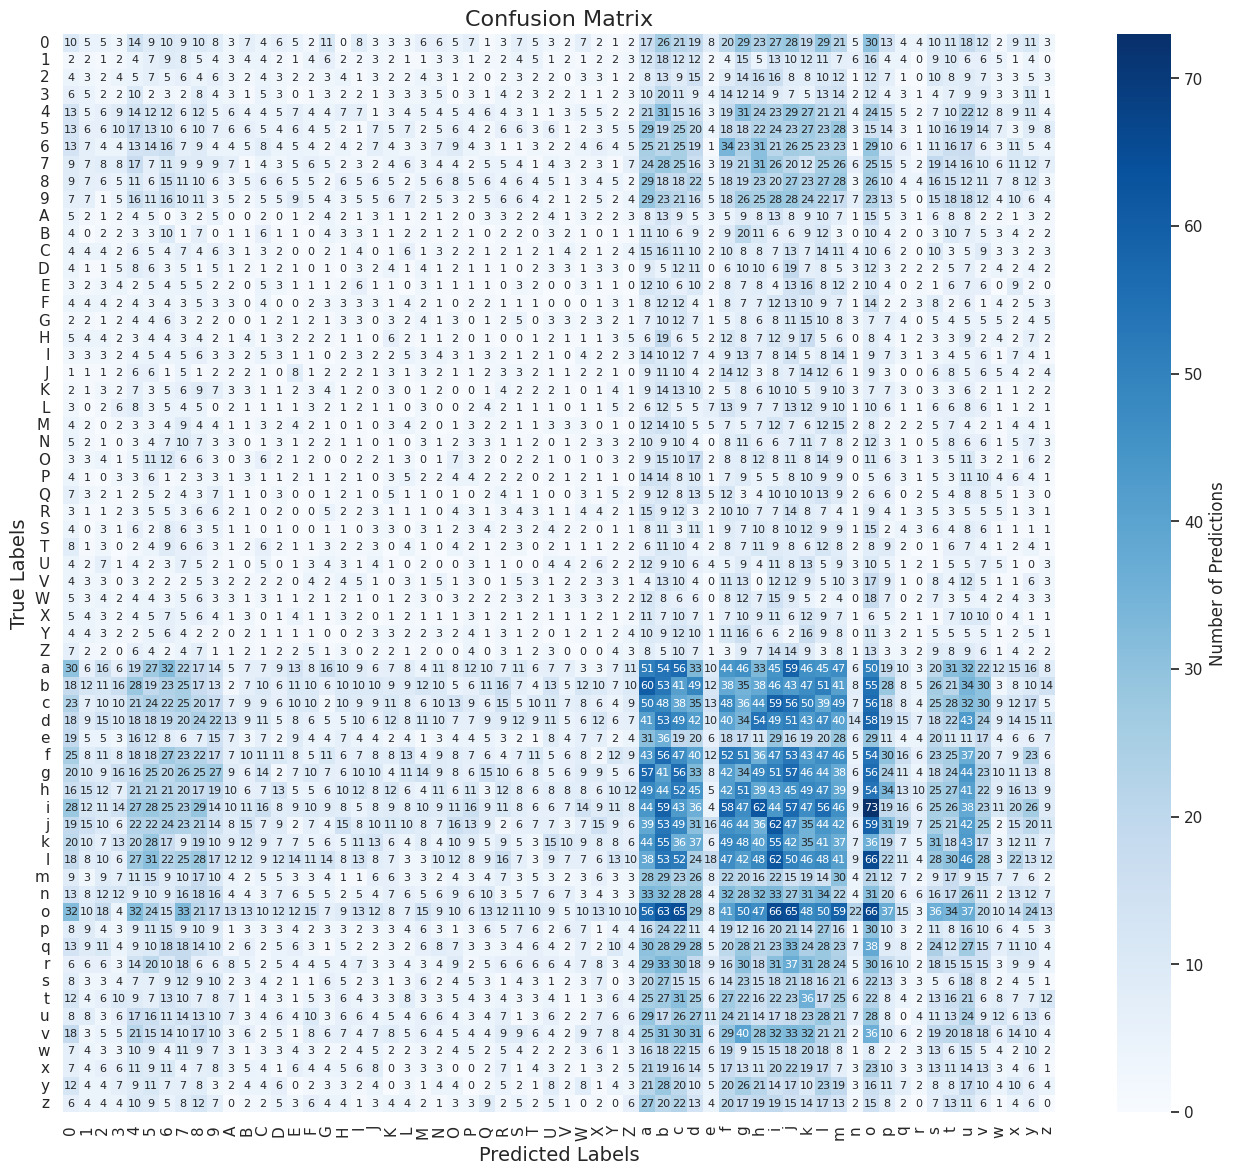

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(val_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(16, 14))  # Increase the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys(),
            annot_kws={"size": 8},  # Reduce the font size for annotations
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### **Step 3: Saving the Model**
This is saving the model for further training & future references.

In [18]:
model.save('my_model.keras')

* ## **Model Summary**

In [20]:
# Get final model accuracy and loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Print the conclusion
print(f"Final Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

# Print model summary
print("\nModel Summary:")
model.summary()

Final Training Accuracy: 85.83%
Final Validation Accuracy: 85.94%
Final Training Loss: 0.4655
Final Validation Loss: 0.6933

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,937,916 (37.91 MB)

 Trainable params: 3,312,638 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,625,278 (25.27 MB)

---